In [1]:
from colormap import rgb2hex
import os,cv2,datetime,shutil,collections,random
import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def ImageAnalyse(Path,ColorsNumber=5,RemoveWhite=True,
                 W=10,H=10,SavedPath='1.png',ColorsFile=os.path.join(os.getcwd(),'ColorsGroup.csv')) : 

    img=cv2.imread(Path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=img.reshape((img.shape[1]*img.shape[0],3))
    Threshold = 10
    if RemoveWhite : 
        NewImg = []
        for i in img : 
            ThisDiff = abs(255-int(list(i)[0])) + abs(255-int(list(i)[1])) + abs(255-int(list(i)[2]))
            if int(ThisDiff) > Threshold : 
                NewImg.append(np.array(i))
        NewImg = np.array(NewImg)
        img = NewImg
    kmeans=KMeans(n_clusters=ColorsNumber)
    s=kmeans.fit(img)    
    labels=kmeans.labels_
    labels=list(labels)
    centroid=kmeans.cluster_centers_
    SelectedCentroids = centroid
    percent=[]
    for i in range(len(centroid)):
        j=labels.count(i)
        j=j/(len(labels))
        percent.append(j)

    AllColorsDict = {}
    for l in range(5) : 
        AllColorsDict[percent[l]] = np.array(centroid)[l]
    
    AllColorsDict = collections.OrderedDict(sorted(AllColorsDict.items(),reverse = True))    
    percent= [k for k in AllColorsDict.keys()]
    centroid = np.array([list(k) for k in AllColorsDict.values()])

    plt.figure(figsize = (W, H))
    plt.pie(percent,labels=np.arange(len(centroid)),
            explode =[0.02 for i in range(len(centroid))],startangle=90,
            colors=np.array(centroid/255),labeldistance=1.3,autopct ='%1.1f%%',pctdistance =1.1)

    plt.axis('equal')
    plt.title('Colors Analysis')
    plt.savefig(SavedPath)
    FinalImage = plt.imread(SavedPath)
    
    def MatchingColors(x): 
        data = pd.read_csv(ColorsFile)
        minn = 100000
        ThisIndex = 0
        for i in range(data.shape[0]) : 
            l = abs(int(data.iloc[i,0])-x[0])
            l += abs(int(data.iloc[i,1])-x[1])
            l += abs(int(data.iloc[i,2])-x[2])
            if l < minn : 
                minn = l
                ThisIndex = int(data.iloc[i,3])
        for i in range(data.shape[0]) : 
            if data.iloc[i,3] == ThisIndex : 
                A1 = [int(data.iloc[i,0]),int(data.iloc[i,1]),int(data.iloc[i,2])]
                i +=1
                A2 = [int(data.iloc[i,0]),int(data.iloc[i,1]),int(data.iloc[i,2])]
                i +=1
                A3 = [int(data.iloc[i,0]),int(data.iloc[i,1]),int(data.iloc[i,2])]
                minn = 100000
                j = 0
                SpecificIndex = 0
                for i in [A1,A2,A3] : 
                    j+=1
                    l = abs(int(i[0])-x[0])
                    l += abs(int(i[1])-x[1])
                    l += abs(int(i[2])-x[2])
                    if l < minn : 
                        minn = l
                        SpecificIndex = j
                if SpecificIndex ==1 : 
                    return [A1,A2,A3]
                elif SpecificIndex ==2 : 
                    return [A2,A1,A3]
                elif SpecificIndex ==3 : 
                    return [A3,A2,A1]


    FinalColors = []
    C = np.array(centroid/255)
    a = int(C[0][0]*255)
    b = int(C[0][1]*255)
    c = int(C[0][2]*255)
    CC = MatchingColors([a,b,c])
    a1 = CC[0][0]
    b1 = CC[0][1]
    c1 = CC[0][2]
    a2 = CC[1][0]
    b2 = CC[1][1]
    c2 = CC[1][2]
    a3 = CC[2][0]
    b3 = CC[2][1]
    c3 = CC[2][2]
    FinalColors.append([rgb2hex(a1,b1,c1),rgb2hex(a2,b2,c2),rgb2hex(a3,b3,c3)])
    a = int(C[1][0]*255)
    b = int(C[1][1]*255)
    c = int(C[1][2]*255)
    CC = MatchingColors([a,b,c])
    a1 = CC[0][0]
    b1 = CC[0][1]
    c1 = CC[0][2]
    a2 = CC[1][0]
    b2 = CC[1][1]
    c2 = CC[1][2]
    a3 = CC[2][0]
    b3 = CC[2][1]
    c3 = CC[2][2]
    
    FinalColors.append([rgb2hex(a1,b1,c1),rgb2hex(a2,b2,c2),rgb2hex(a3,b3,c3)])
    
    a = int(C[2][0]*255)
    b = int(C[2][1]*255)
    c = int(C[2][2]*255)
    CC = MatchingColors([a,b,c])
    a1 = CC[0][0]
    b1 = CC[0][1]
    c1 = CC[0][2]
    a2 = CC[1][0]
    b2 = CC[1][1]
    c2 = CC[1][2]
    a3 = CC[2][0]
    b3 = CC[2][1]
    c3 = CC[2][2]
    
    FinalColors.append([rgb2hex(a1,b1,c1),rgb2hex(a2,b2,c2),rgb2hex(a3,b3,c3)])
    
    a = int(C[3][0]*255)
    b = int(C[3][1]*255)
    c = int(C[3][2]*255)
    CC = MatchingColors([a,b,c])
    a1 = CC[0][0]
    b1 = CC[0][1]
    c1 = CC[0][2]
    a2 = CC[1][0]
    b2 = CC[1][1]
    c2 = CC[1][2]
    a3 = CC[2][0]
    b3 = CC[2][1]
    c3 = CC[2][2]
    
    FinalColors.append([rgb2hex(a1,b1,c1),rgb2hex(a2,b2,c2),rgb2hex(a3,b3,c3)])
    
    
    a = int(C[4][0]*255)
    b = int(C[4][1]*255)
    c = int(C[4][2]*255)
    CC = MatchingColors([a,b,c])
    a1 = CC[0][0]
    b1 = CC[0][1]
    c1 = CC[0][2]
    a2 = CC[1][0]
    b2 = CC[1][1]
    c2 = CC[1][2]
    a3 = CC[2][0]
    b3 = CC[2][1]
    c3 = CC[2][2]
    
    FinalColors.append([rgb2hex(a1,b1,c1),rgb2hex(a2,b2,c2),rgb2hex(a3,b3,c3)])
    RandomColors = []
    RandomColors.extend(FinalColors[0])
    RandomColors.extend(random.sample([FinalColors[1][0],FinalColors[2][0],FinalColors[3][0],FinalColors[4][0]], 2))
 
    return SelectedCentroids,FinalImage, FinalColors,RandomColors

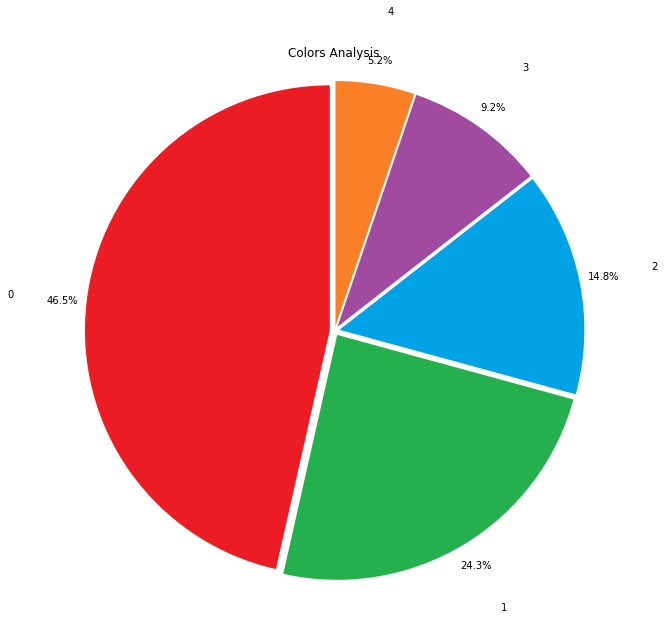

In [3]:
C,Image,Colors,RandomColors = ImageAnalyse(r'C:\Users\Admin#\Desktop\Gheid\6666.jpg') 

In [4]:
RandomColors

['#EC1D25', '#FEF102', '#0367B2', '#10A0C5', '#21AF4B']

In [5]:
Colors

[['#EC1D25', '#FEF102', '#0367B2'],
 ['#21AF4B', '#602E91', '#F8901F'],
 ['#10A0C5', '#C41A7E', '#FFC809'],
 ['#A34198', '#FDB928', '#3CB977'],
 ['#F58323', '#03A45E', '#5A3094']]

In [6]:
C

array([[235.7943028 ,  28.07082153,  36.49889833],
       [  1.17795353, 161.8423134 , 230.36777064],
       [ 35.16802168, 176.28485396,  77.34296899],
       [159.97149644,  73.53285827, 160.37925574],
       [251.2398317 , 126.76297335,  38.75175316]])

In [7]:
Image

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       ...,

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1.

In [8]:
def CheckImages(FilesPath=os.path.join(os.getcwd(), r'AllImages\*.*'),SelectedNumber=5,ColorsNumber=5) : 

    if not os.path.isfile(os.path.join(os.getcwd(), 'ImagesCodes.csv')) : 
        ColorData = pd.DataFrame(columns = ['FileName','Color1','Color2','Color3','Color4','Color5'])
        ColorData.head()
        ColorData.to_csv(os.path.join(os.getcwd(), 'ImagesCodes.csv'),index=False)
    
    def GetColors(Path,Clusters = ColorsNumber) : 
        img=cv2.imread(Path)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=img.reshape((img.shape[1]*img.shape[0],3))
        Threshold = 10
        NewImg = []
        for i in img : 
            ThisDiff = abs(255-int(list(i)[0])) + abs(255-int(list(i)[1])) + abs(255-int(list(i)[2]))
            if int(ThisDiff) > Threshold : 
                NewImg.append(np.array(i))
        NewImg = np.array(NewImg)
        img = NewImg

        kmeans=KMeans(n_clusters=Clusters)
        s=kmeans.fit(img)    
        labels=kmeans.labels_
        labels=list(labels)
        centroid=kmeans.cluster_centers_
        percent=[]
        for i in range(len(centroid)):
            j=labels.count(i)
            j=j/(len(labels))
            percent.append(j)
        return np.array(centroid) 


    SelectedDict = {}
    Files = gb.glob(FilesPath)
    AllFiles = []
    for f in Files : 
        if f[-3:].lower() in ['jpg','jpeg','png'] : 
            AllFiles.append(f.split('\\')[-1])

    
    
    data = pd.read_csv(os.path.join(os.getcwd(), 'ImagesCodes.csv'))
    ee = 0
    for image in AllFiles : 
        ee+=1
        if image not in  list(data['FileName']) : 
            
            print(f'Processing Number  : {ee}  ,  File : {image}')
            TheseColors = GetColors(os.path.join(os.getcwd(), 'AllImages',image))
            a,b,c,d,e = TheseColors 

            Temp  = pd.DataFrame([[image,str(list(np.round(a))),str(list(np.round(b))),
                                   str(list(np.round(c))),str(list(np.round(d))),str(list(np.round(e)))]],
                                 columns=['FileName','Color1','Color2','Color3','Color4','Color5'])
            

            data = data.append(Temp)
            data.to_csv(os.path.join(os.getcwd(), 'ImagesCodes.csv'),index=False)

            
            print('----------------------------------------------')
    return data


In [9]:
a = CheckImages()
a.head()

,FileName,Color1,Color2,Color3,Color4,Color5
0,1.png,"[91.0, 90.0, 80.0]","[226.0, 228.0, 224.0]","[45.0, 46.0, 38.0]","[192.0, 189.0, 176.0]","[132.0, 133.0, 127.0]"
1,2.png,"[148.0, 151.0, 144.0]","[16.0, 14.0, 11.0]","[99.0, 100.0, 90.0]","[191.0, 195.0, 197.0]","[59.0, 57.0, 48.0]"
2,3.png,"[0.0, 0.0, 0.0]","[146.0, 114.0, 83.0]","[206.0, 177.0, 141.0]","[10.0, 19.0, 26.0]","[73.0, 59.0, 48.0]"
3,3d-abstract-scene-background_23-2148893771.jpg,"[231.0, 243.0, 234.0]","[166.0, 200.0, 174.0]","[189.0, 218.0, 197.0]","[211.0, 230.0, 217.0]","[138.0, 182.0, 151.0]"
4,3d-render-gold-bowling-strike_167713-1.jpg,"[37.0, 30.0, 11.0]","[137.0, 78.0, 21.0]","[251.0, 241.0, 74.0]","[230.0, 115.0, 21.0]","[84.0, 51.0, 14.0]"


In [10]:
def NearestImages(SelectedCentroids,FilesPath=os.path.join(os.getcwd(), r'AllImages\*.*'),
                 SelectedNumber=5,ColorsNumber=5) : 
    if os.path.isfile(os.path.join(os.getcwd(), 'ImagesCodes.csv')) : 
        data = pd.read_csv(os.path.join(os.getcwd(), 'ImagesCodes.csv'))
    else : 
        print('Images Codes file is not Found')
        return None
    
    SelectedDict = {}
    for i in range(data.shape[0]): 
        a1 = float(data['Color1'][i].strip('[').strip(']').split(',')[0])
        a2 = float(data['Color1'][i].strip('[').strip(']').split(',')[1])
        a3 = float(data['Color1'][i].strip('[').strip(']').split(',')[2])

        b1 = float(data['Color2'][i].strip('[').strip(']').split(',')[0])
        b2 = float(data['Color2'][i].strip('[').strip(']').split(',')[1])
        b3 = float(data['Color2'][i].strip('[').strip(']').split(',')[2])

        c1 = float(data['Color3'][i].strip('[').strip(']').split(',')[0])
        c2 = float(data['Color3'][i].strip('[').strip(']').split(',')[1])
        c3 = float(data['Color3'][i].strip('[').strip(']').split(',')[2])

        d1 = float(data['Color4'][i].strip('[').strip(']').split(',')[0])
        d2 = float(data['Color4'][i].strip('[').strip(']').split(',')[1])
        d3 = float(data['Color4'][i].strip('[').strip(']').split(',')[2])

        e1 = float(data['Color5'][i].strip('[').strip(']').split(',')[0])
        e2 = float(data['Color5'][i].strip('[').strip(']').split(',')[1])
        e3 = float(data['Color5'][i].strip('[').strip(']').split(',')[2])
        
        TheseColors = [[a1,a2,a3],
                       [b1,b2,b3],
                       [c1,c2,c3],
                       [d1,d2,d3],
                       [e1,e2,e3]]

        FileDiff = 0
        for TC in TheseColors : 
            SelectedDiff = []
            for SC in SelectedCentroids : 
                ThisDiff=abs(int(list(SC)[0])-int(list(TC)[0]))+abs(int(list(SC)[1])-int(list(TC)[1]))+abs(int(list(SC)[2])-int(list(TC)[2]))
                SelectedDiff.append(ThisDiff)
            FileDiff +=min(SelectedDiff)
        SelectedDict[str(data['FileName'][i])] = FileDiff
    FinalDict  = {k: v for k, v in sorted(SelectedDict.items(), key=lambda item: item[1])}
    FinalDict = {k: FinalDict[k] for k in list(FinalDict.keys())[:SelectedNumber]}
    Now = datetime.datetime.now()
    FileName = f'{Now.year}_{Now.month}_{Now.day}_{Now.hour}_{Now.minute}'
    os.makedirs(os.path.join(os.getcwd(), FileName))
    for file in list(FinalDict.keys()) : 
        shutil.copy(os.path.join(os.getcwd(),'AllImages',file),os.path.join(os.getcwd(), FileName,file))

    return list(FinalDict.keys() )

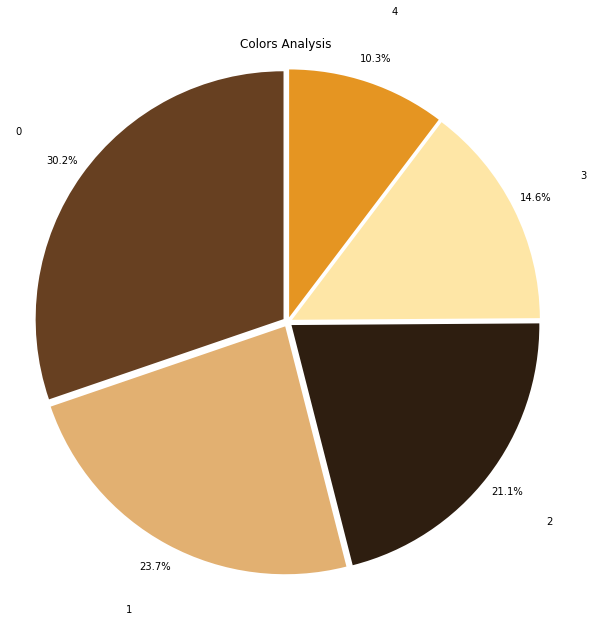

In [11]:
C,Image,Colors,RandomColors = ImageAnalyse(r'C:\Users\Admin#\Desktop\Gheid\Logos\07.jpg') 

In [12]:
NearestImages(C)

['texture-sand-brown-crumpled-fabric_23-2148516006.jpg',
 'yellow-red-leaves-surrounding-trees-park_181624-29883.jpg',
 'pathway-middle-forest-with-big-green-leafed-trees_181624-4332.jpg',
 'beautiful-wooden-pathway-going-breathtaking-colorful-trees-forest_181624-5840.jpg',
 '3d-render-gold-bowling-strike_167713-1.jpg']

In [13]:
C

array([[ 45.51665234,  29.70122882,  16.2306043 ],
       [225.55447708, 176.25817811, 112.97623541],
       [103.23110891,  64.43696612,  32.85347794],
       [229.13205255, 148.79258298,  34.14343958],
       [254.08470315, 229.65467404, 165.58143912]])

In [14]:
RandomColors

['#7D0000', '#007D00', '#00007D', '#FFE4AD', '#E49E24']

In [15]:
Colors

[['#7D0000', '#007D00', '#00007D'],
 ['#F6A973', '#63C296', '#7D6DAE'],
 ['#000000', '#FAFAFA', '#7D7D7D'],
 ['#FFE4AD', '#D8A1C9', '#A0D6BE'],
 ['#E49E24', '#962C91', '#14A85C']]

In [ ]:
print('toto le chien')